<a href="https://colab.research.google.com/github/ronan99/FruitQuality/blob/master/Fruit_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy import array
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import keras
from keras import regularizers, optimizers

In [0]:
from google.colab import files
import os
import zipfile

if not os.path.exists("/content/kaggle.json"):
  f= open("kaggle.json","w+")
  f.write("{\"username\":\"ronan99\",\"key\":\"1c0a53b3f270310914936fea6801b644\"}")
  f.close()

In [0]:
!ls -lha kaggle.json
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config path -p /content
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification
import shutil


In [0]:
if not os.path.exists("/content/fruits-fresh-and-rotten-for-classification"):
  os.makedirs("/content/fruits-fresh-and-rotten-for-classification")
os.rename('/content/fruits-fresh-and-rotten-for-classification.zip','/content/fruits-fresh-and-rotten-for-classification/fruits-fresh-and-rotten-for-classification.zip')

os.chdir('/content/fruits-fresh-and-rotten-for-classification')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

In [28]:



img_width, img_height = 224, 224
train_data_dir = '/content/fruits-fresh-and-rotten-for-classification/dataset/train'
validation_data_dir = '/content/fruits-fresh-and-rotten-for-classification/dataset/test'

nb_train_samples = 10901
nb_validation_samples = 2698
epochs = 40
batch_size = 32
if K.image_data_format() == 'wa':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

train_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    seed=42,
    shuffle=True,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    seed=42,
    shuffle=True,
    class_mode='categorical'
)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [0]:
classifier = Sequential()

classifier.add(Conv2D(40, (3, 3), input_shape = [150,150,3], activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(80, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(120, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(80, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.25))

classifier.add(Dense(units = 6, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [0]:

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size
# this is the augmentation configuration we will use for training
hist = classifier.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=50
)



In [0]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 40)      1120      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 80)        80080     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 80)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 120)       86520     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 120)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 120)       0         
__________

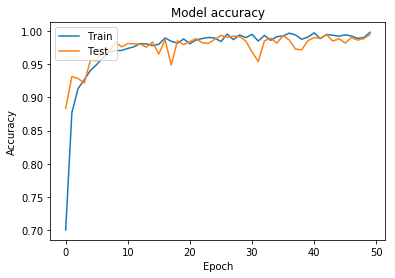

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
import numpy as np
from PIL import Image

def imgReturn(path):
  img = Image.open(path)
  img = img.resize((150,150))
  img = np.array(img).astype(np.float32)[None,:,:,:]
  if(img.shape[3]==3):
    img = np.reshape(img,[1,150,150,3])
    return img
  return img

In [0]:
path =  '/content/fruits-fresh-and-rotten-for-classification/dataset/train/rottenapples'
for file in os.listdir(path):
  testImg = imgReturn(path+'/'+file)
  if(testImg.shape[3]==3):
    predict = classifier.predict(testImg)
    print(np.argmax(predict[0]))
    
  
  

In [0]:
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf

In [0]:
cache_dir = expanduser(join('~', '.keras'))
if not exists(cache_dir):
    makedirs(cache_dir)
models_dir = join(cache_dir, 'models')
if not exists(models_dir):
    makedirs(models_dir)
    
!cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
!cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/
!cp ../input/keras-pretrained-models/resnet50* ~/.keras/models/

print("Available Pretrained Models:\n")
!ls ~/.keras/models

In [0]:
inception_base = applications.ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = inception_base.output
x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a fully connected output/classification layer
predictions = Dense(6, activation='softmax')(x)
# create the full network so we can train on it
inception_transfer = Model(inputs=inception_base.input, outputs=predictions)

In [0]:
inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [32]:
histTransf = inception_transfer.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=5
)

Epoch 1/5
340/340 [==============================] - 93s 273ms/step - loss: 0.7882 - acc: 0.7724 - val_loss: 0.2600 - val_acc: 0.9390
Epoch 2/5
340/340 [==============================] - 81s 239ms/step - loss: 0.2259 - acc: 0.9463 - val_loss: 0.1137 - val_acc: 0.9768
Epoch 3/5
340/340 [==============================] - 80s 235ms/step - loss: 0.1318 - acc: 0.9651 - val_loss: 0.0708 - val_acc: 0.9844
Epoch 4/5
340/340 [==============================] - 80s 235ms/step - loss: 0.0981 - acc: 0.9770 - val_loss: 0.0472 - val_acc: 0.9888
Epoch 5/5
340/340 [==============================] - 80s 235ms/step - loss: 0.0691 - acc: 0.9840 - val_loss: 0.0428 - val_acc: 0.9888


In [0]:
plt.plot(histTransf.history['acc'])
plt.plot(histTransf.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()